### Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.max_columns', 100)

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.despine()
sns.set_context('notebook') 
sns.set_style('ticks') 

colours = ['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8C564B', '#E377C2','#7F7F7F', '#BCBD22', '#17BECF']
crayon = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(colours)

### Importing Data Set

In [2]:
data = pd.read_excel('default of credit card clients.xls')

col_names = ['Balance', 'Sex', 'Education', 'Marriage', 'Age',
            'Paid_Sep', 'Paid_Aug', 'Paid_Jul', 'Paid_Jun', 'Paid_May', 'Paid_Apr',
            'Bill_Sep', 'Bill_Aug', 'Bill_Jul', 'Bill_Jun', 'Bill_May', 'Bill_Apr',
            'PayAmt_Sep', 'PayAmt_Aug', 'PayAmt_Jul', 'PayAmt_Jun', 'PayAmt_May', 'PayAmt_Apr',
            'Default']

data.drop(data.index[:1], inplace=True)
data.columns = col_names
data = data.astype(str).astype(int)

Importing the dataset, replacing the header with the proper names, and renaming the response variable as 'Default'

### Preliminary EDA

In [3]:
data.head()

,Balance,Sex,Education,Marriage,Age,Paid_Sep,Paid_Aug,Paid_Jul,Paid_Jun,Paid_May,Paid_Apr,Bill_Sep,Bill_Aug,Bill_Jul,Bill_Jun,Bill_May,Bill_Apr,PayAmt_Sep,PayAmt_Aug,PayAmt_Jul,PayAmt_Jun,PayAmt_May,PayAmt_Apr,Default
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# Variables
response = 'Default'

continuous = ['Balance',
              'Bill_Sep', 'Bill_Aug', 'Bill_Jul', 'Bill_Jun', 'Bill_May', 'Bill_Apr',
              'PayAmt_Sep', 'PayAmt_Aug', 'PayAmt_Jul', 'PayAmt_Jun', 'PayAmt_May', 'PayAmt_Apr']

categorical = ['Sex', 'Education', 'Marriage',
              'Paid_Sep', 'Paid_Aug', 'Paid_Jul', 'Paid_Jun', 'Paid_May', 'Paid_Apr']
       
discrete = ['Age']

predictors = continuous + categorical + discrete

In [5]:
data.describe().round(2)

,Balance,Sex,Education,Marriage,Age,Paid_Sep,Paid_Aug,Paid_Jul,Paid_Jun,Paid_May,Paid_Apr,Bill_Sep,Bill_Aug,Bill_Jul,Bill_Jun,Bill_May,Bill_Apr,PayAmt_Sep,PayAmt_Aug,PayAmt_Jul,PayAmt_Jun,PayAmt_May,PayAmt_Apr,Default
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,167484.32,1.60,1.85,1.55,35.49,-0.02,-0.13,-0.17,-0.22,-0.27,-0.29,51223.33,49179.08,47013.15,43262.95,40311.40,38871.76,5663.58,5921.16,5225.68,4826.08,4799.39,5215.50,0.22
std,129747.66,0.49,0.79,0.52,9.22,1.12,1.20,1.20,1.17,1.13,1.15,73635.86,71173.77,69349.39,64332.86,60797.16,59554.11,16563.28,23040.87,17606.96,15666.16,15278.31,17777.47,0.42
min,10000.00,1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,-2.00,-2.00,-165580.00,-69777.00,-157264.00,-170000.00,-81334.00,-339603.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,50000.00,1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,3558.75,2984.75,2666.25,2326.75,1763.00,1256.00,1000.00,833.00,390.00,296.00,252.50,117.75,0.00
50%,140000.00,2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,0.00,0.00,22381.50,21200.00,20088.50,19052.00,18104.50,17071.00,2100.00,2009.00,1800.00,1500.00,1500.00,1500.00,0.00
75%,240000.00,2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,0.00,0.00,67091.00,64006.25,60164.75,54506.00,50190.50,49198.25,5006.00,5000.00,4505.00,4013.25,4031.50,4000.00,0.00
max,1000000.00,2.00,6.00,3.00,79.00,8.00,8.00,8.00,8.00,8.00,8.00,964511.00,983931.00,1664089.00,891586.00,927171.00,961664.00,873552.00,1684259.00,896040.00,621000.00,426529.00,528666.00,1.00


Nothing too interesting:
* NB: 1AUD ~ 20NT
* 81 different credit balance tiers
* education has 7 unique values but only 4 in the descrption?
* marriage has 4 uniques but only 3 in description?
* age range of 56 years
* PAY (payment status): -1 means paid fully for the corresponding bill, 0 no payment (yet), 1,2,...,8 means payment late
* Current bill and previous payment - so if fully paid, a bill in August will match the payment in September

In [6]:
# Missing data
data.isnull().sum(axis=0).reset_index()

,index,0
0,Balance,0
1,Sex,0
2,Education,0
3,Marriage,0
4,Age,0
5,Paid_Sep,0
6,Paid_Aug,0
7,Paid_Jul,0
8,Paid_Jun,0
9,Paid_May,0


No missing values to impute - yay!

In [7]:
data.shape

(30000, 24)

30,000 obs with 23 vars and 1 response

In [15]:
# Percentage of Responces
data['Default'].value_counts(normalize=True).round(3)*100

0    77.9
1    22.1
Name: Default, dtype: float64

22.1% of responses are defaults; this is an imbalanced class problem

### Further EDA

In [16]:
# Tests for skewness of data, to determine whether to scale with median or mean
from scipy.stats import skewtest
skewed = []
non_skewed = []

for i in continuous+discrete:
    p = skewtest(data[i], nan_policy='omit')[1] # calculates skewtest p_value (H0 = normally distributed)
    if p < 0.01:
        skewed.append(i)
    else:
        non_skewed.append(i)
        
print('Skewed variables are:\n{0}\n\nNon-skewed variables are:\n{1}'.format(skewed, non_skewed))

Skewed variables are:
['Balance', 'Bill_Sep', 'Bill_Aug', 'Bill_Jul', 'Bill_Jun', 'Bill_May', 'Bill_Apr', 'PayAmt_Sep', 'PayAmt_Aug', 'PayAmt_Jul', 'PayAmt_Jun', 'PayAmt_May', 'PayAmt_Apr', 'Age']

Non-skewed variables are:
[]


Data all seems skewed, probably because of the zero-inflated data?
*TRANSFORM WITH POWER*

In [18]:
from scipy.stats import kruskal
# Non-parametric Kruskal-Wallis ANOVA rank test - to determine class independence
H = []
p = []

for i in categorical+discrete:
    h, pval = kruskal(*[data.loc[data[i]==v, response] for v in data[i].unique()])
    H.append(h)
    p.append(pval)

# Calculates significance at 1% and appends results
test_results = []
for value in p:
    if value < 0.01:
        test_results.append('True')
    else:
        test_results.append('False')

# Creates tables with the values above
table = pd.DataFrame(H, columns=['H Stat'], index=categorical+discrete)
table['p values'] = pd.DataFrame(p, index=categorical+discrete)
table['Reject, \u03b1=0.01'] = pd.DataFrame(test_results, index=categorical+discrete)

table.round(2)

,H Stat,p values,"Reject, α=0.01"
Sex,47.90,0.0,True
Education,163.21,0.0,True
Marriage,35.66,0.0,True
Paid_Sep,5365.79,0.0,True
Paid_Aug,3474.35,0.0,True
Paid_Jul,2622.37,0.0,True
Paid_Jun,2341.39,0.0,True
Paid_May,2197.62,0.0,True
Paid_Apr,1886.77,0.0,True
Age,158.55,0.0,True


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF for multicollinearity check
pred = continuous+discrete

X = data[pred].as_matrix()

VIF = pd.DataFrame([np.sqrt(variance_inflation_factor(X,j)) for j in range(len(pred))], index=pred, columns=['SQRT(VIF)'])

VIF.sort_values(by='SQRT(VIF)', ascending=False).round(2)

,SQRT(VIF)
Age,1.66
PayAmt_May,0.02
PayAmt_Apr,0.02
PayAmt_Sep,0.01
Bill_Jun,0.01
Bill_Jul,0.01
PayAmt_Jul,0.00
Bill_May,0.00
Balance,0.00
Bill_Sep,NaN


In [20]:
crosstab = pd.crosstab(data['Education'], data['Default'])
crosstab

Default,0,1
Education,,
0,14,0
1,8549,2036
2,10700,3330
3,3680,1237
4,116,7
5,262,18
6,43,8


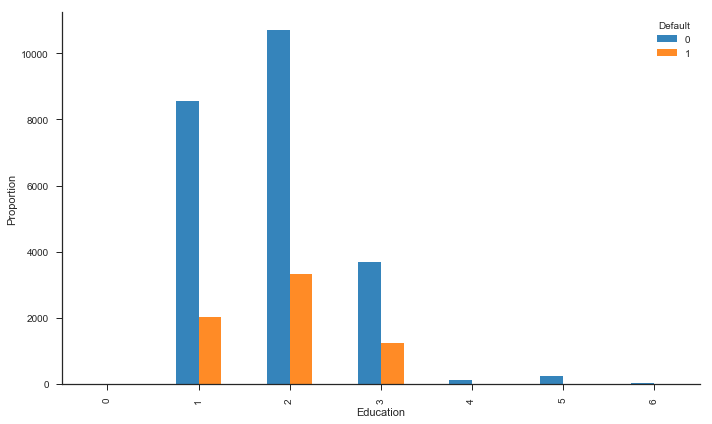

In [21]:
# Table based on above
fig, ax = plt.subplots(figsize=(10,6))
(crosstab).plot(kind='bar', alpha=0.9, ax=ax)
ax.set_xlabel('Education')
ax.set_ylabel('Proportion')
ax.legend_.set_title('Default')
plt.tight_layout()
sns.despine()
plt.show()

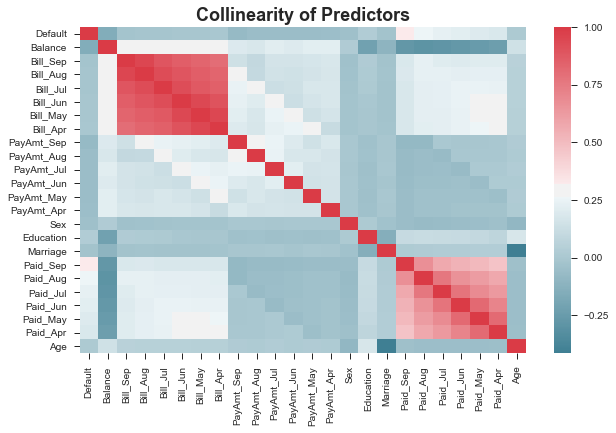

In [22]:
# Correlation matrix for all variables against each other
fig, ax = plt.subplots(figsize=(10,6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data[response+predictors].corr(), ax=ax, cmap=cmap)
ax.set_title('Collinearity of Predictors', fontweight='bold', fontsize=18)

plt.show()

In [23]:
# Lists correlation pairs with absolute value of 0.75 or greater
columns = list(data.columns)
corr = pd.DataFrame(data.corr()) # Below requires correlation values in a table

high_corr = np.where(np.abs(corr) >= 0.75) # Chose 0.75 arbitrarily
high_corr = [(corr.columns[x], corr.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]

high_corr

[('Paid_Aug', 'Paid_Jul'),
 ('Paid_Jul', 'Paid_Jun'),
 ('Paid_Jun', 'Paid_May'),
 ('Paid_May', 'Paid_Apr'),
 ('Bill_Sep', 'Bill_Aug'),
 ('Bill_Sep', 'Bill_Jul'),
 ('Bill_Sep', 'Bill_Jun'),
 ('Bill_Sep', 'Bill_May'),
 ('Bill_Sep', 'Bill_Apr'),
 ('Bill_Aug', 'Bill_Jul'),
 ('Bill_Aug', 'Bill_Jun'),
 ('Bill_Aug', 'Bill_May'),
 ('Bill_Aug', 'Bill_Apr'),
 ('Bill_Jul', 'Bill_Jun'),
 ('Bill_Jul', 'Bill_May'),
 ('Bill_Jul', 'Bill_Apr'),
 ('Bill_Jun', 'Bill_May'),
 ('Bill_Jun', 'Bill_Apr'),
 ('Bill_May', 'Bill_Apr')]

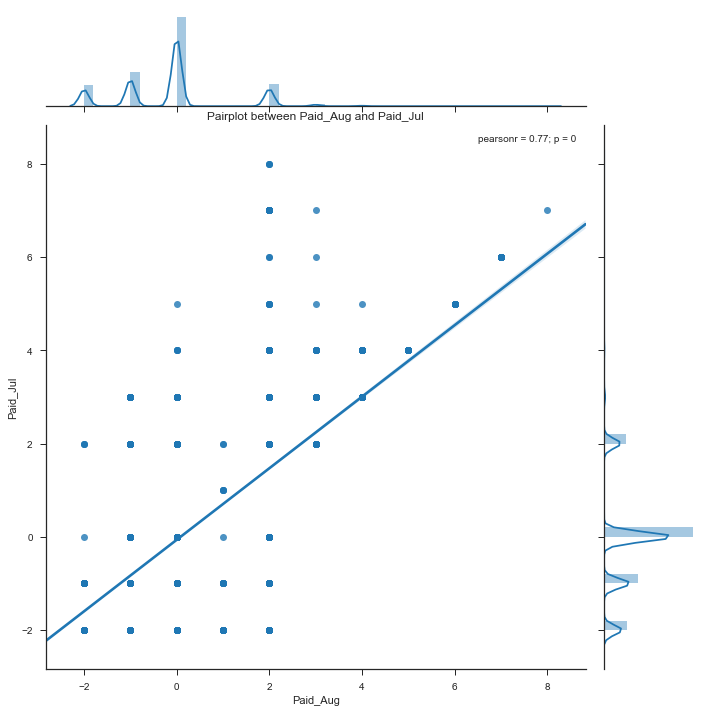

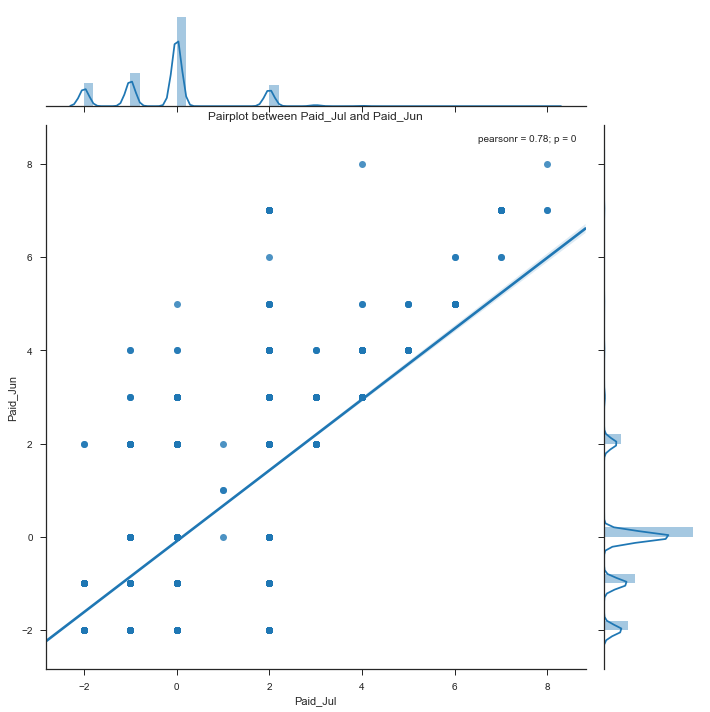

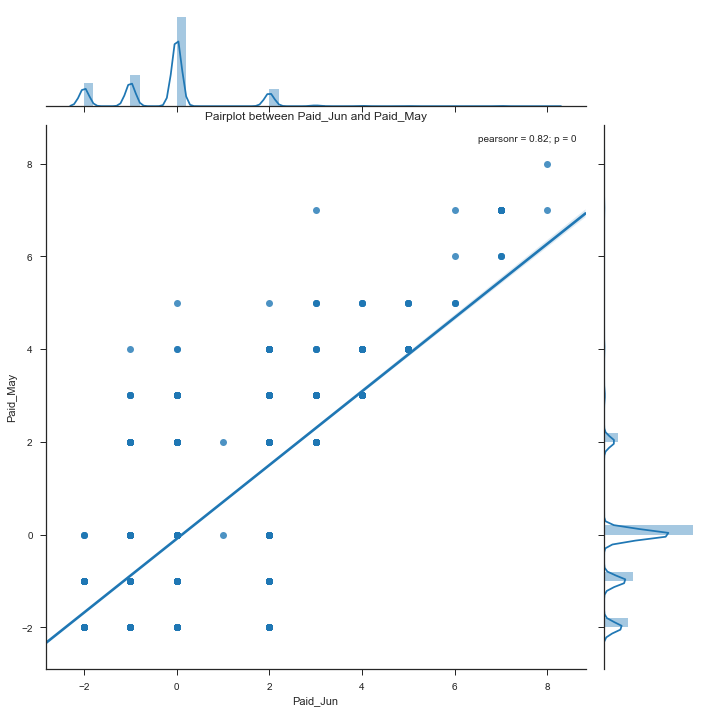

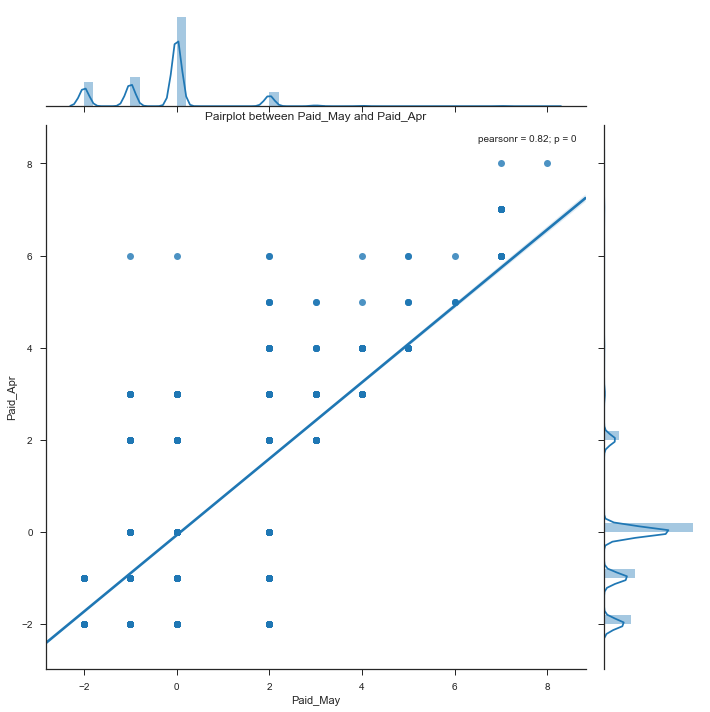

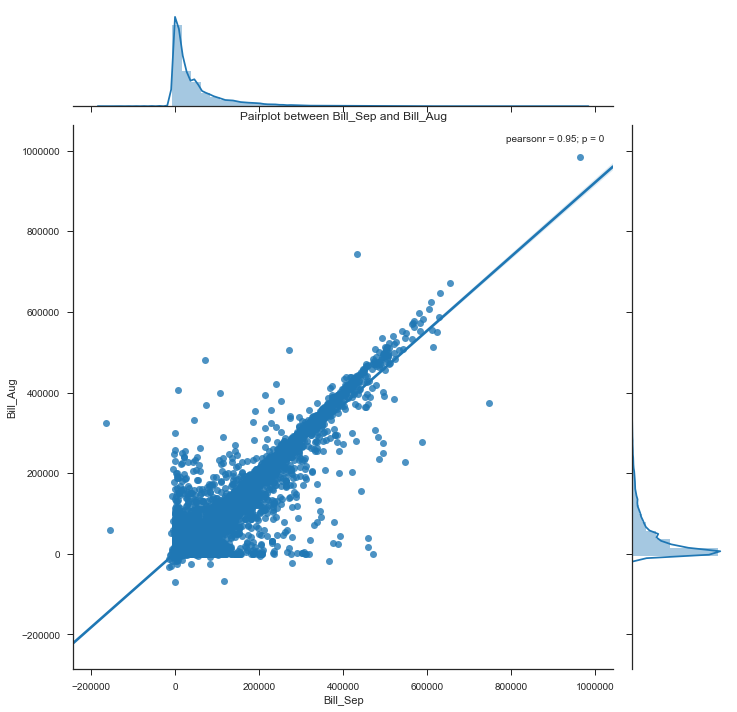

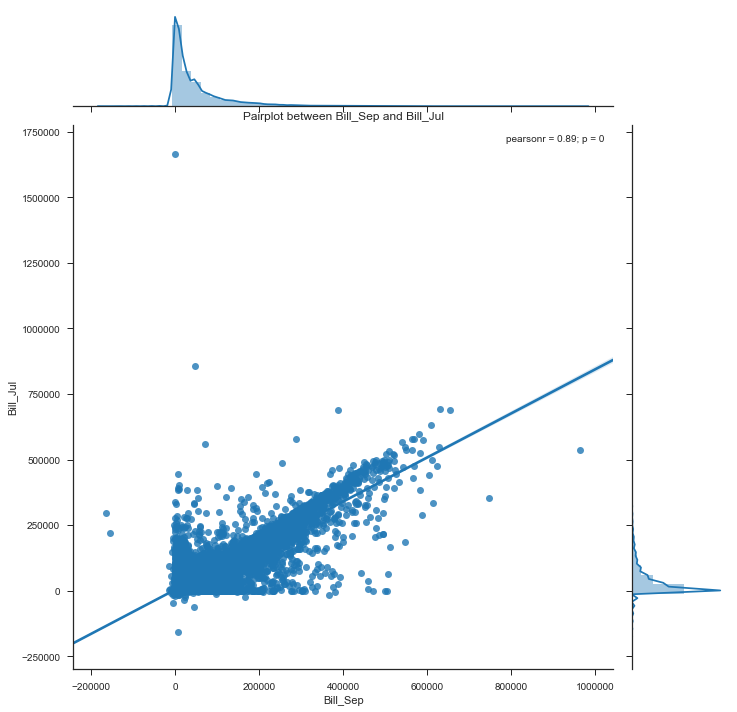

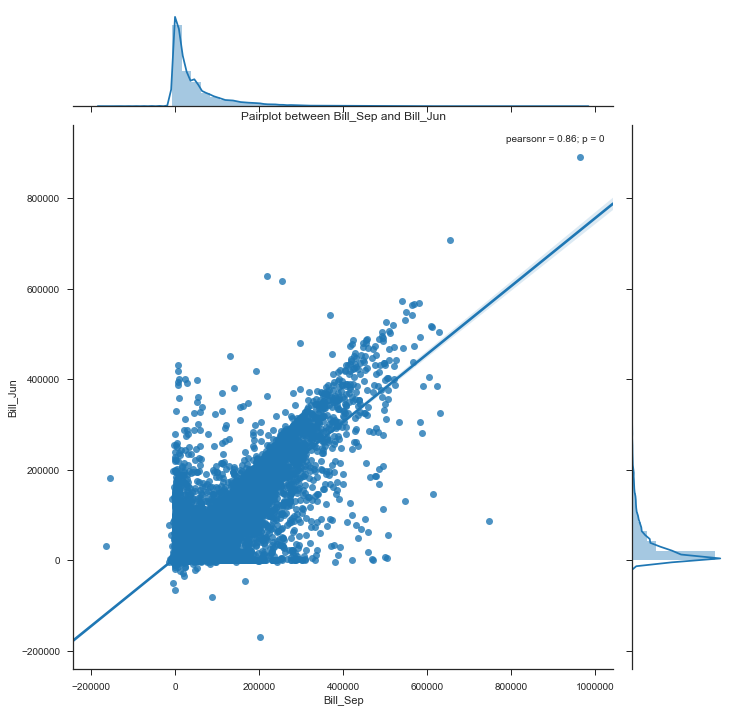

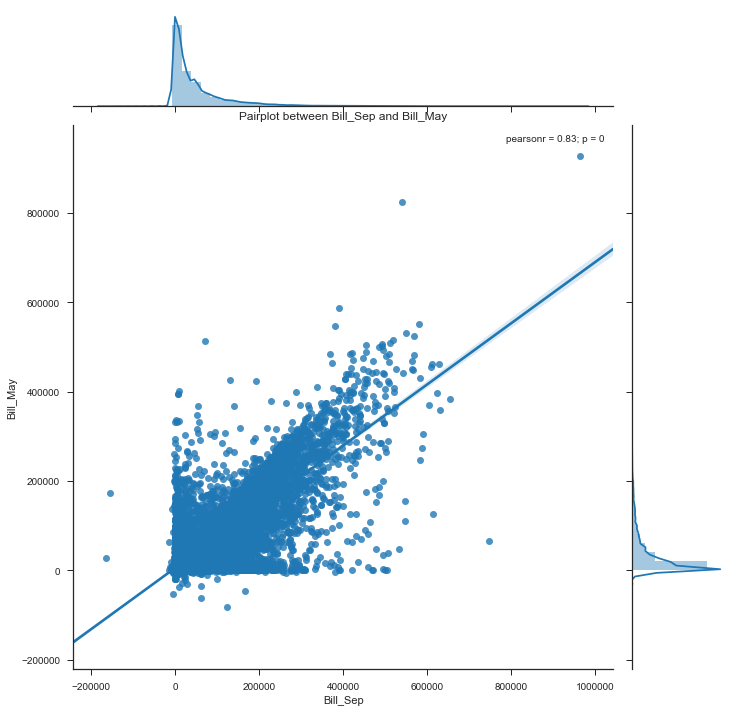

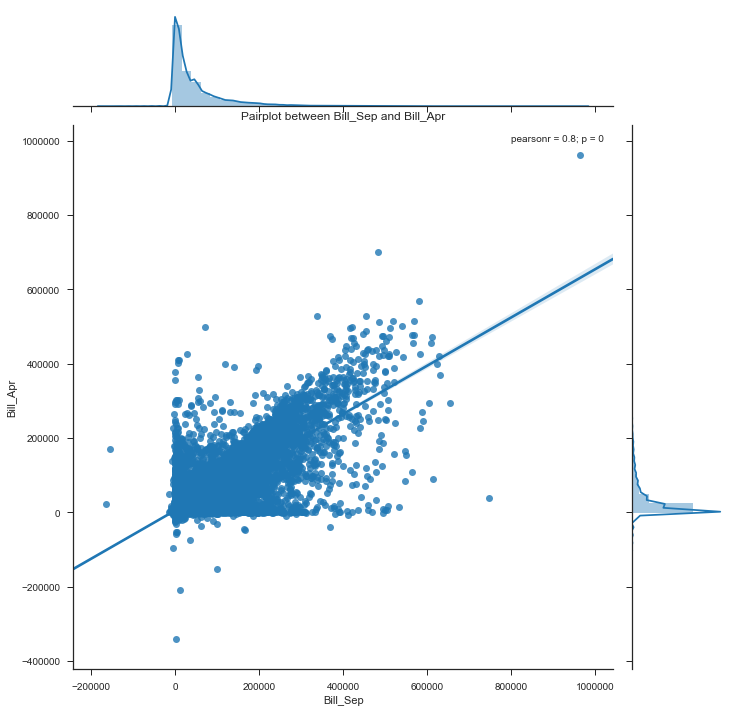

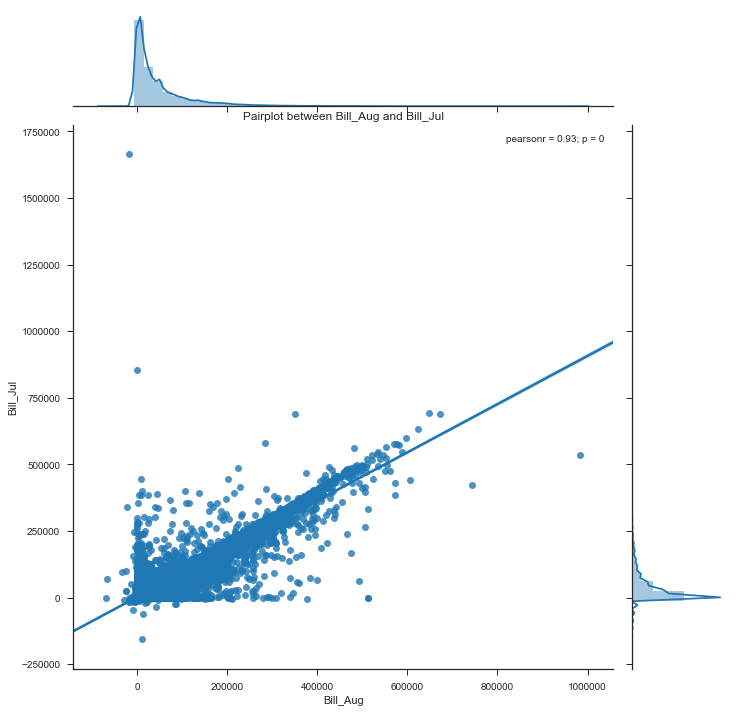

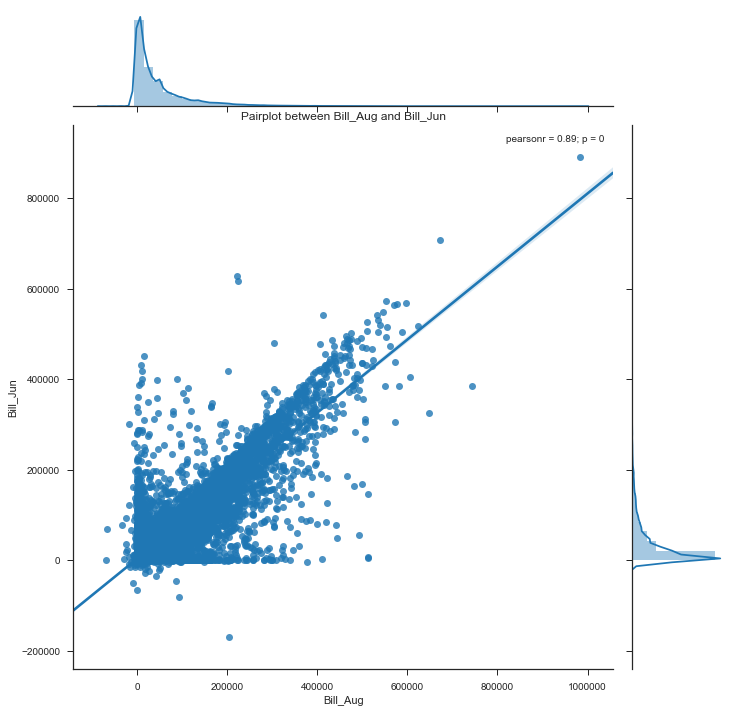

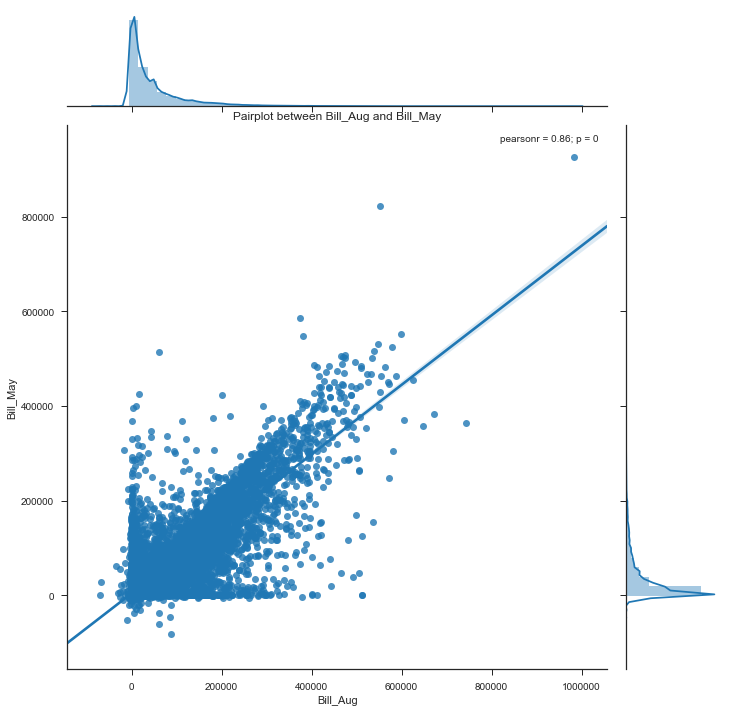

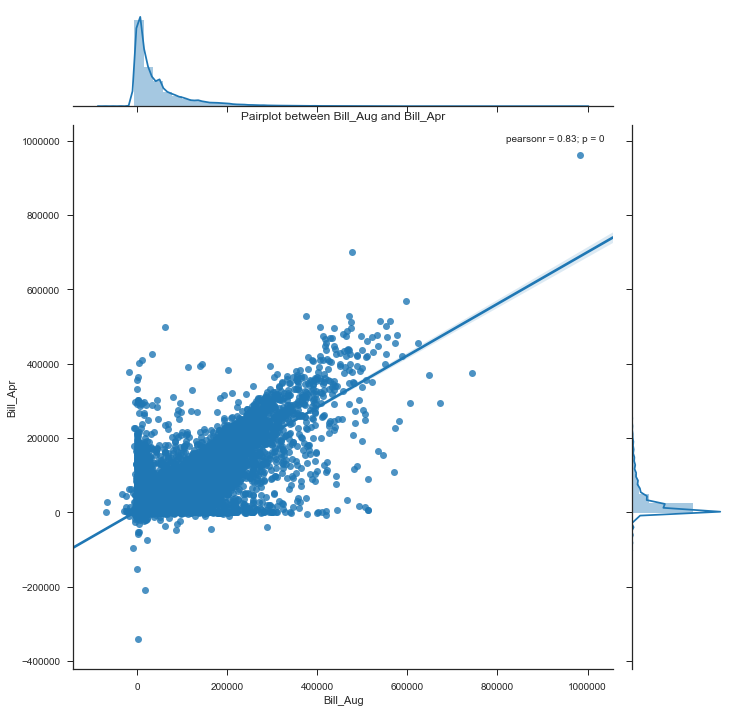

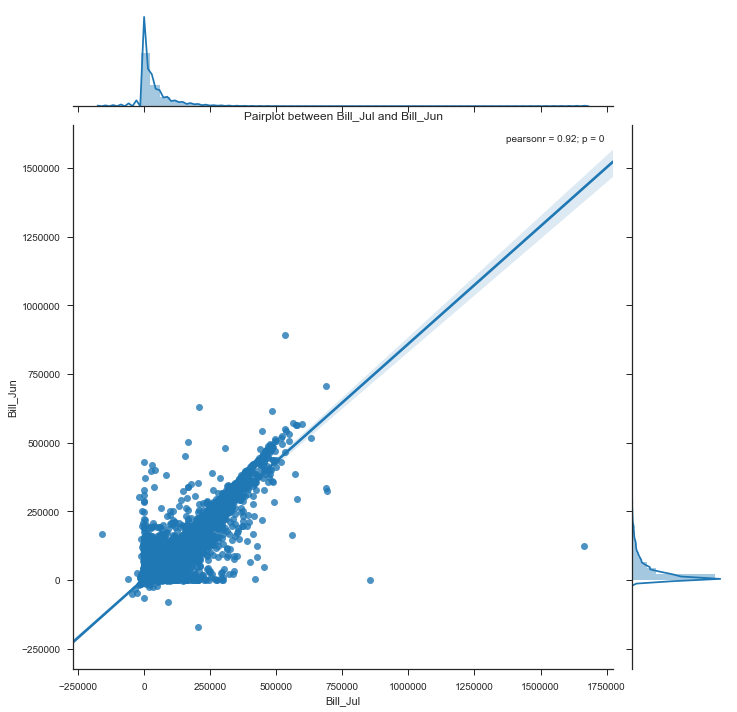

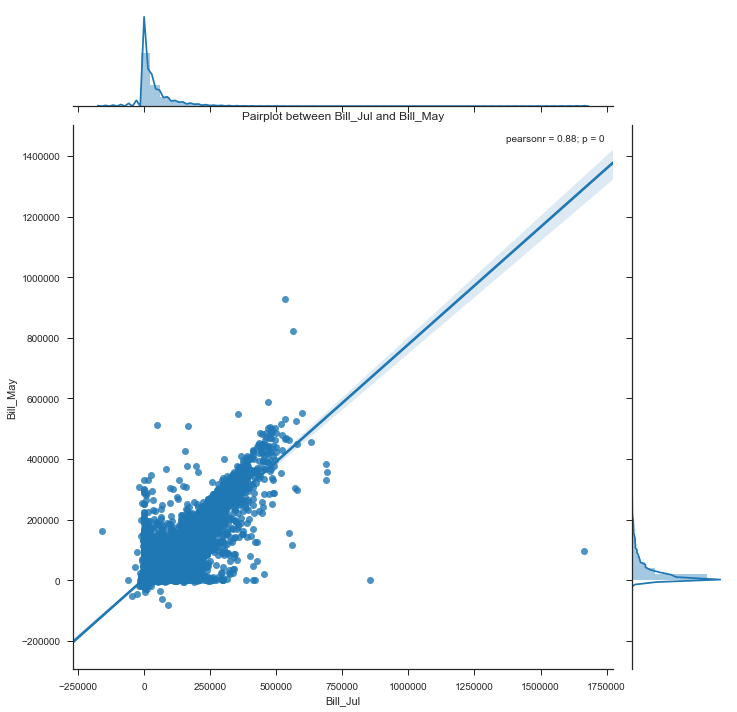

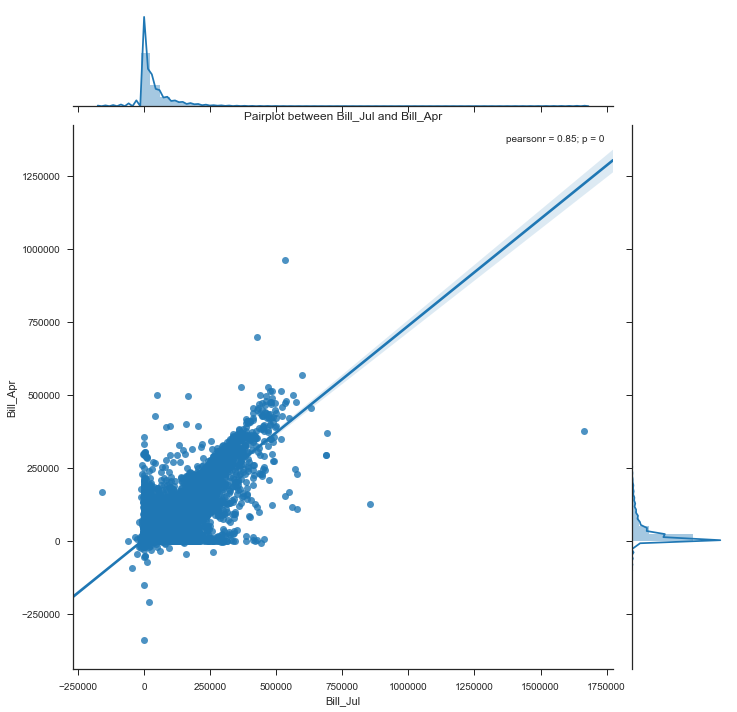

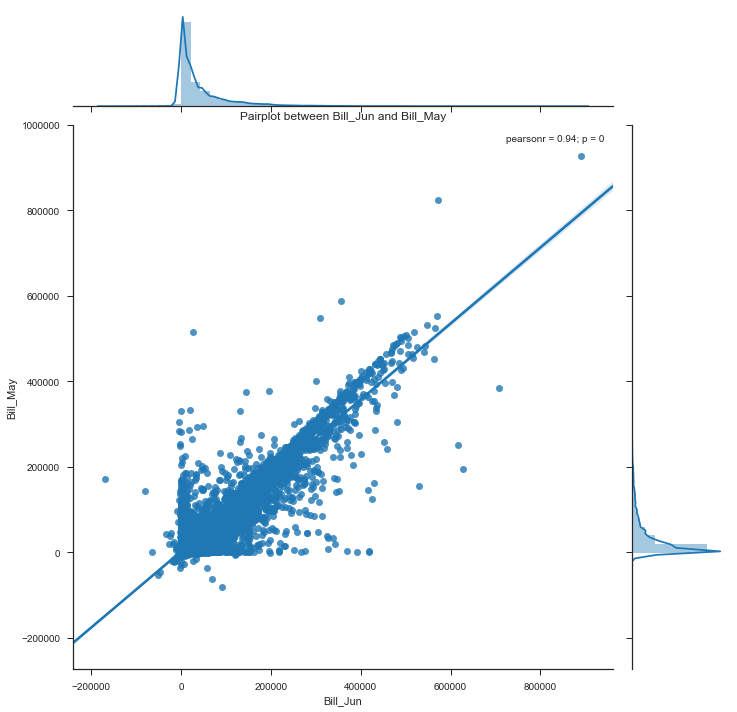

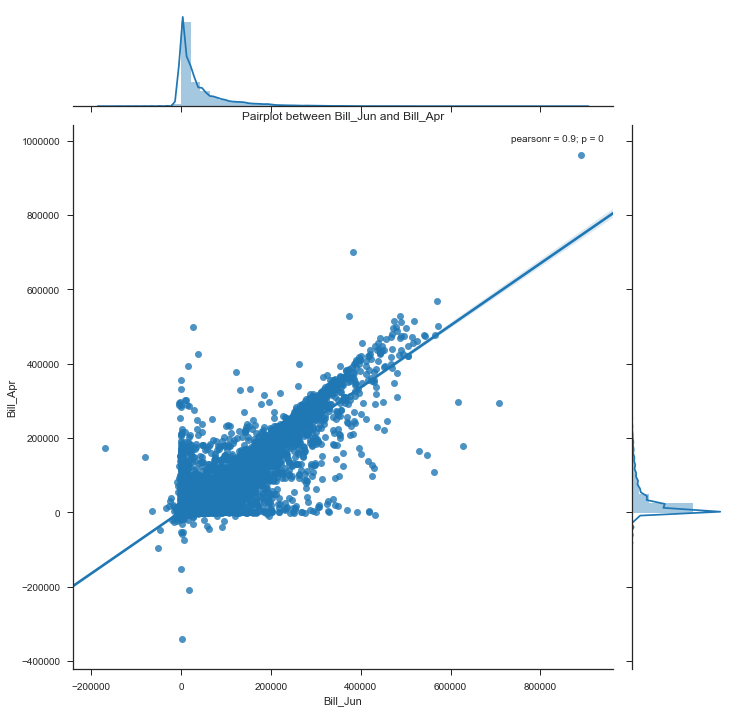

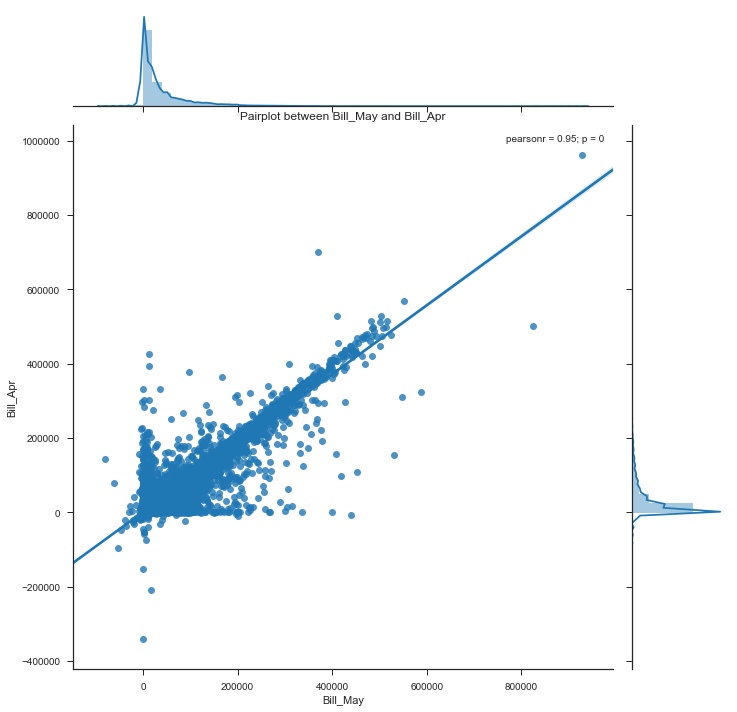

In [25]:
# Pairplots for high correlation pairs (based on above)
for i in high_corr:
    fig = sns.jointplot(x=data[i[0]], y=data[i[1]], kind='reg', size=10)
    plt.title('Pairplot between ' + str(i[0]) + ' and ' + str(i[1]))
    plt.show()

TypeError: 'NoneType' object is not iterable

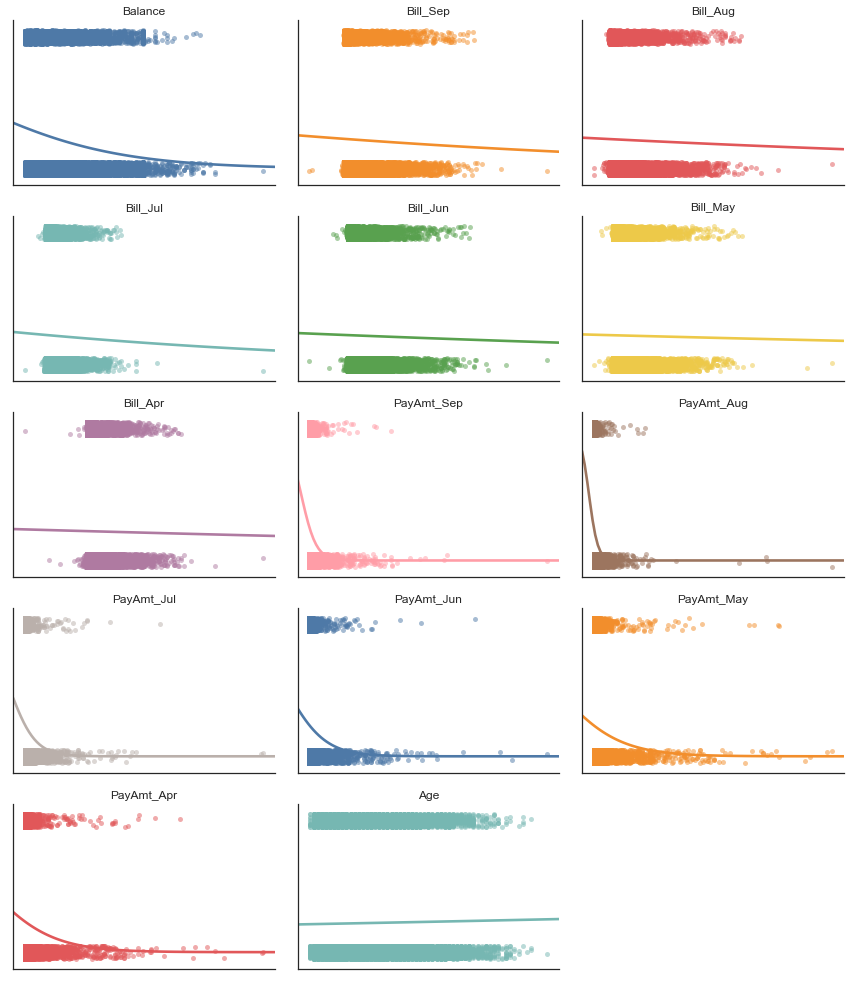

In [27]:
from statlearning import plot_logistic_regressions
with sns.color_palette(crayon):
    fig, ax = plot_logistic_regressions(data[continuous+discrete], data['Default'])

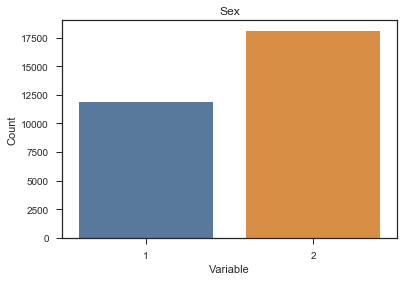

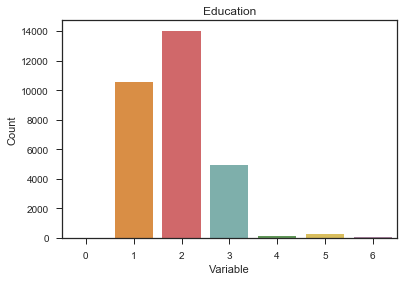

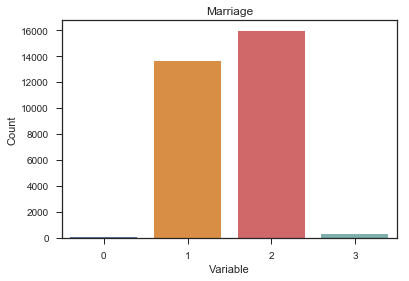

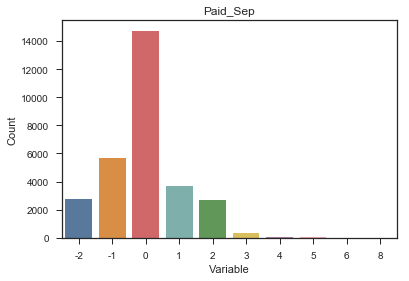

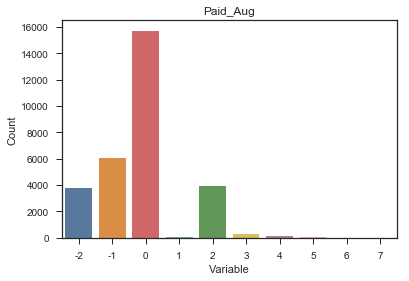

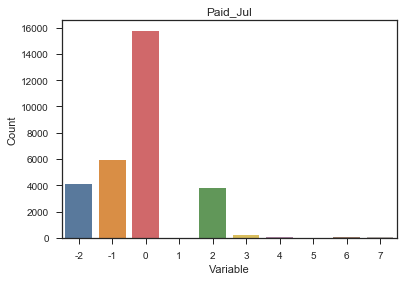

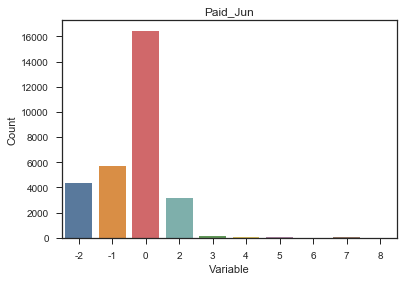

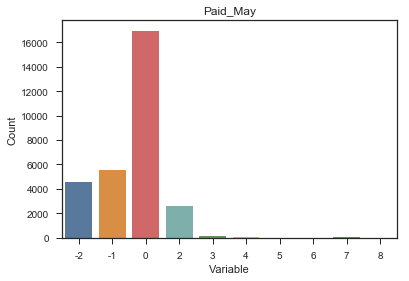

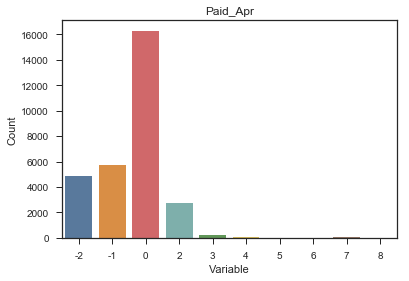

In [28]:
# Cluster variable
with sns.color_palette(crayon):
    for i in categorical:
        clust_type_count = data[i].value_counts()
        ax = sns.barplot(x =clust_type_count.index[:10], y= clust_type_count[:10])
        ax.set(xlabel='Variable', ylabel='Count', title=str(i))
        plt.show()

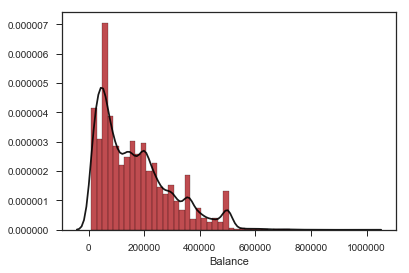

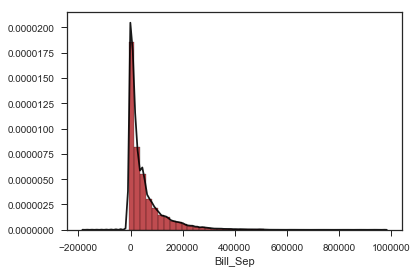

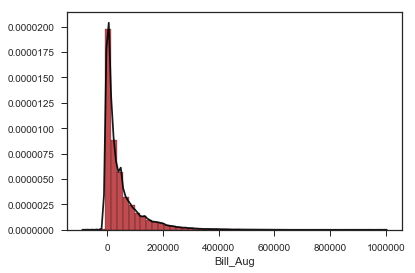

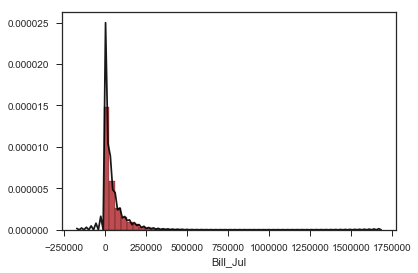

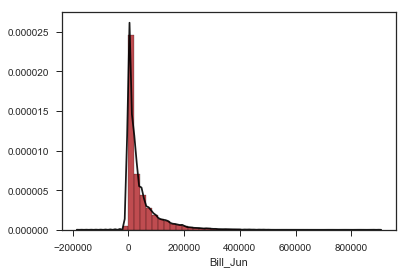

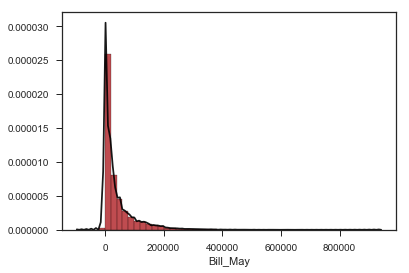

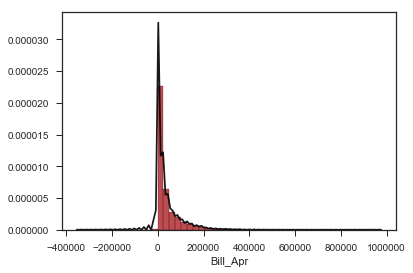

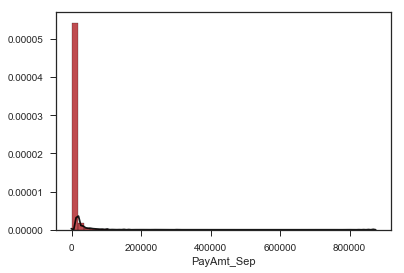

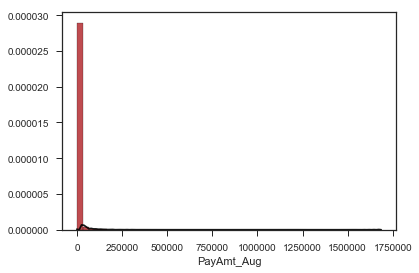

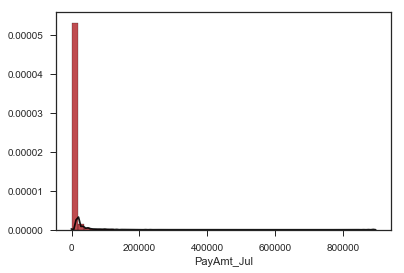

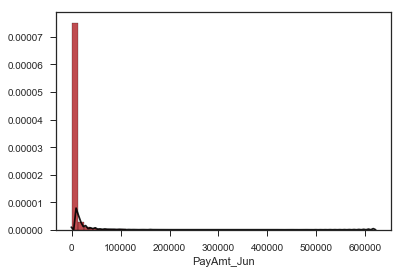

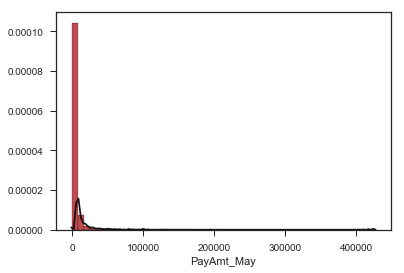

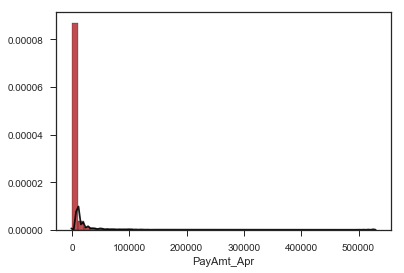

In [29]:
# Histogram for continuous variables
def hist(series):
    fig, ax = plt.subplots()
    sns.distplot(series, ax=ax,
                 hist_kws={'alpha': 0.75,
                           'edgecolor':'black',
                           'color': sns.color_palette('Reds')[-1]},  
                 kde_kws={'color': 'black', 'alpha': 0.9})
    return plt.show()

for i in continuous:
    hist(data[i])

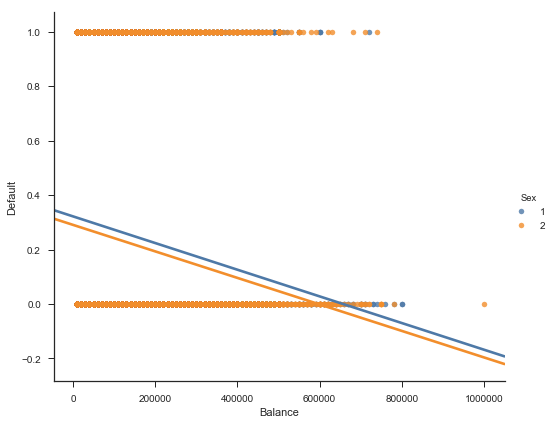

In [30]:
# EXAMPLE OF INTERACTION TERMS
with sns.color_palette(crayon):
    sns.lmplot('Balance', 'Default', data=data, hue='Sex', size=6, aspect=1.2, scatter_kws={'s': 30}, ci=None)
    plt.show()

### OTHER THINGS

* Look at interactions
* Think about transformations for the skewed data
* How to deal with other variables, e.g. -2 in Pay??

Useful links:
1. https://rstudio-pubs-static.s3.amazonaws.com/281390_8a4ea1f1d23043479814ec4a38dbbfd9.html
2. https://www.kaggle.com/lucabasa/credit-card-default-a-very-pedagogical-notebook
3. https://www.kaggle.com/snaveen13/extensive-eda-and-5-classification-algorithm
4. https://sevenpillarsinstitute.org/case-studies/taiwans-credit-card-crisis/ (info on Taiwan Credit Crisis)